## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("D:/ML/Google Stock Price/Google_Stock_Price_Train.csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#We are taking only Open column to predict the opening stock price
train = dataset.iloc[:,1:2].values
train.shape

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train = scaler.fit_transform(train)

In [6]:
scaled_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
#Create a set of 60 timestamp and 1 output
x_train = []
y_train = []
for i in range(60,len(scaled_train)):
    x_train.append(scaled_train[(i-60):i,0])
    y_train.append(scaled_train[i,0])
    

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape,y_train.shape

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

In [10]:
x_train.shape

(1198, 60)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
x_train.shape

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Building the RNN Model

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [55]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [56]:
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [70]:
model.fit(x_train,y_train,epochs = 100, batch_size = 28)

Epoch 1/100
43/43 [==============================] - 3s 70ms/step - loss: 0.0021
Epoch 2/100
43/43 [==============================] - 3s 69ms/step - loss: 0.0023
Epoch 3/100
43/43 [==============================] - 3s 67ms/step - loss: 0.0021
Epoch 4/100
43/43 [==============================] - 3s 75ms/step - loss: 0.0021
Epoch 5/100
43/43 [==============================] - 4s 85ms/step - loss: 0.0019: 0s - l
Epoch 6/100
43/43 [==============================] - 3s 71ms/step - loss: 0.0019
Epoch 7/100
43/43 [==============================] - 3s 73ms/step - loss: 0.0019
Epoch 8/100
43/43 [==============================] - 3s 68ms/step - loss: 0.0019
Epoch 9/100
43/43 [==============================] - 3s 69ms/step - loss: 0.0020: 0s - loss: 
Epoch 10/100
43/43 [==============================] - 3s 72ms/step - loss: 0.0020
Epoch 11/100
43/43 [==============================] - 3s 70ms/step - loss: 0.0018
Epoch 12/100
43/43 [==============================] - 3s 70ms/step - loss: 0.0017
Epoc

43/43 [==============================] - 3s 69ms/step - loss: 0.0015


## Predicting the stock price

In [63]:
test_dataset = pd.read_csv("D:/ML/Google Stock Price/Google_Stock_Price_Test.csv")

In [64]:
test = test_dataset.iloc[:,1:2].values

In [65]:
total_data = pd.concat((dataset['Open'],test_dataset['Open']),axis=0)
inputs = total_data[len(total_data)-len(test_dataset)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [66]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

(20, 60)


In [67]:
x_test.shape

(20, 60, 1)

In [71]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

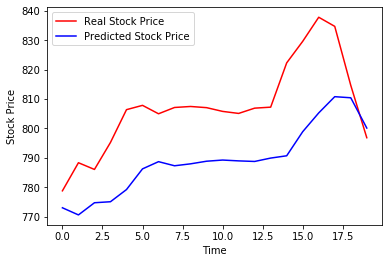

In [72]:
plt.plot(test,color='red',label = "Real Stock Price")
plt.plot(prediction,color = 'blue',label = "Predicted Stock Price")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()